# CS 178 Project
## Import part

In [21]:
import math, os, sys
import numpy as np
import pandas as pd
import cv2

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms


## Read image for train

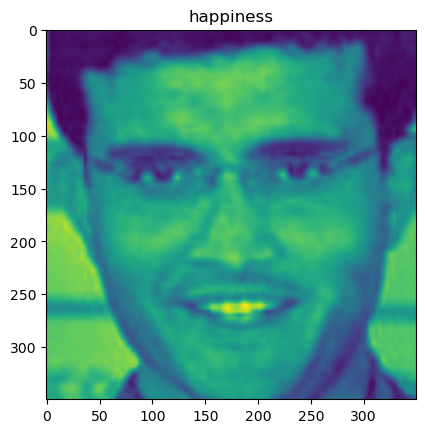

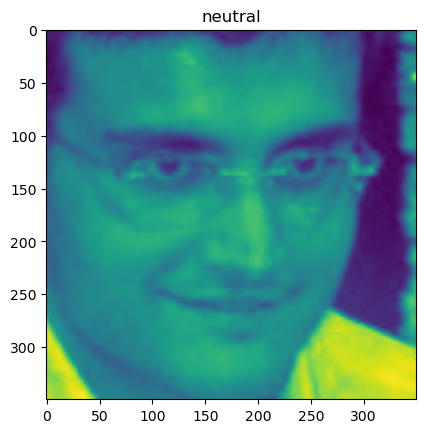

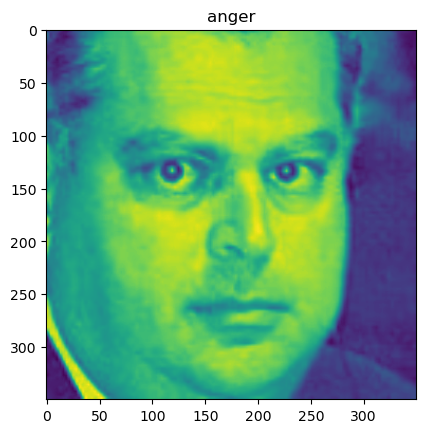

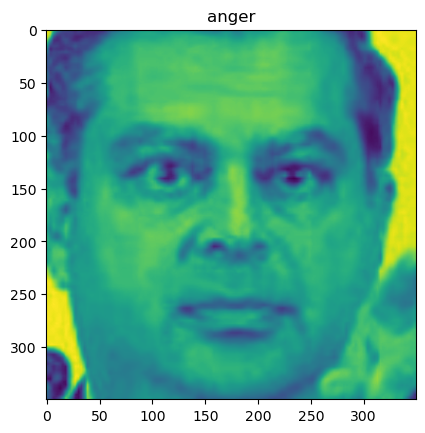

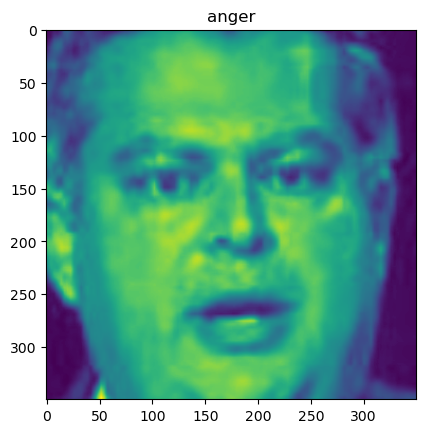

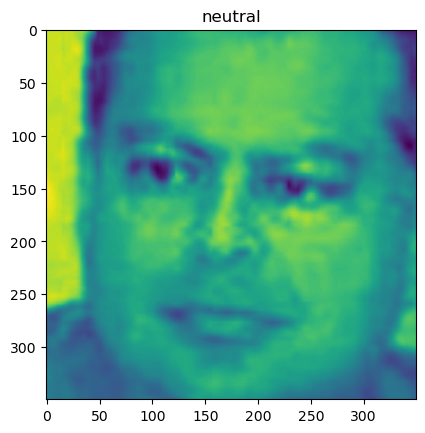

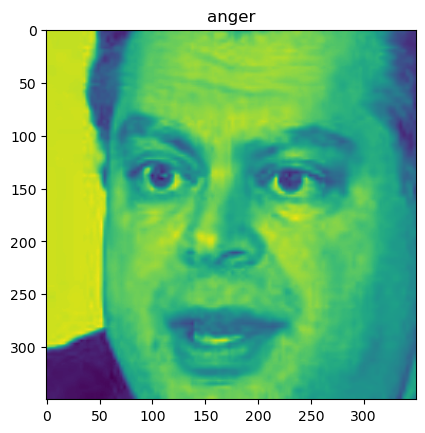

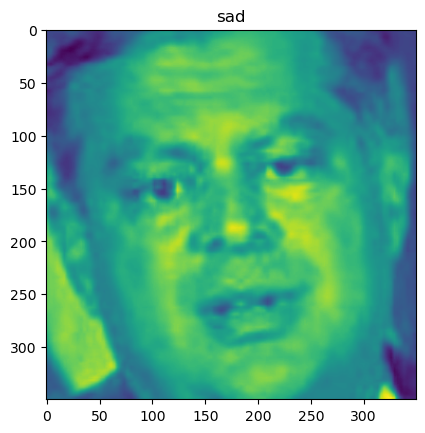

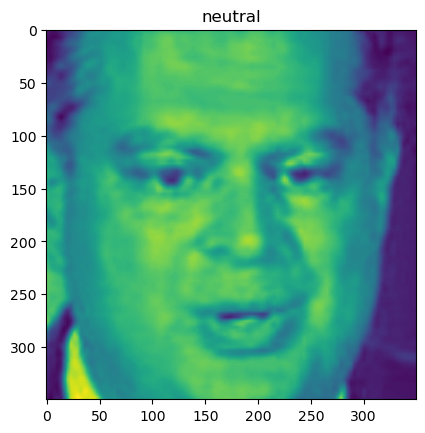

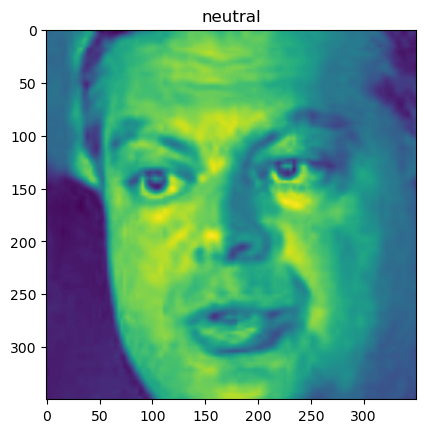

In [42]:
test_data = pd.read_csv('data/500_picts_satz.csv')
train_data = pd.read_csv('data/legend.csv')

image_paths = train_data.iloc[:, 1]
labels = train_data.iloc[:, 2]

folder_path = 'images/'

X = []
y = labels[0:10]

# Comment below when training
size = 10
count = 0
# Comment above when training

for filename in image_paths:
    # Comment below when training
    if count >= size:
        break
    # Comment above when training
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for common image file extensions
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
            X.append(torch.Tensor(img))
    count += 1
X = torch.stack(X).unsqueeze(1) # convert to pytorch tensor

# Comment below when training
for image, label in zip(X, y):
    plt.imshow(image.numpy()[0])
    plt.title(label)
    plt.show()
# Comment above when training

## CNN Test
### Define a Convolutional Neural Network

In [49]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 because its greyscale
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 84 * 84, 120) # shape of image after pooling twice
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7) # 7 is label count

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [51]:
F.softmax(net(X), dim=0)

tensor([[0.0603, 0.0876, 0.0854, 0.1648, 0.1126, 0.1191, 0.0458],
        [0.0433, 0.0786, 0.0909, 0.1943, 0.1894, 0.0876, 0.0931],
        [0.1895, 0.0855, 0.0551, 0.0832, 0.1182, 0.0569, 0.1836],
        [0.0293, 0.1347, 0.1623, 0.1248, 0.0882, 0.0273, 0.0820],
        [0.1830, 0.0939, 0.0673, 0.0590, 0.0782, 0.1133, 0.0852],
        [0.0579, 0.1343, 0.1188, 0.0654, 0.0658, 0.2200, 0.0985],
        [0.0666, 0.1273, 0.1071, 0.0650, 0.0822, 0.0444, 0.0964],
        [0.0668, 0.0891, 0.1044, 0.1259, 0.1095, 0.1368, 0.0762],
        [0.1432, 0.0680, 0.0907, 0.0601, 0.1175, 0.0406, 0.1262],
        [0.1601, 0.1009, 0.1180, 0.0575, 0.0384, 0.1541, 0.1130]],
       grad_fn=<SoftmaxBackward0>)